In [11]:
# Perform hierarchical clustering on the Play data
# and and the data generated with the help of two
# equations of concentric circles, adding some random
# noise. Apply various distance measures, including
# single, multiple, and average linkages, and ward.

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_circles


In [13]:
dataset = pd.read_excel("play.xlsx")
dataset.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [14]:
# one hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# label encoder
label_encoder = LabelEncoder()

In [15]:
# outlook
print('Outlook: ', dataset['Outlook'].nunique())
dataset['Outlook'] = label_encoder.fit_transform(dataset['Outlook'])

# Windy
print('Windy: ', dataset['Windy'].nunique())
dataset['Windy'] = label_encoder.fit_transform(dataset['Windy'])

# Decision
print('Decision: ', dataset['Decision'].nunique())
dataset['Decision'] = label_encoder.fit_transform(dataset['Decision'])

dataset.describe()

Outlook:  3
Windy:  2
Decision:  2


,Outlook,Temperature,Humidity,Windy,Decision
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,73.571429,80.285714,0.571429,0.642857
std,0.828742,6.571667,9.840486,0.513553,0.497245
min,0.000000,64.000000,65.000000,0.000000,0.000000
25%,0.250000,69.250000,71.250000,0.000000,0.000000
50%,1.000000,72.000000,80.000000,1.000000,1.000000
75%,2.000000,78.750000,88.750000,1.000000,1.000000
max,2.000000,85.000000,96.000000,1.000000,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int64
 2   Humidity     14 non-null     int64
 3   Windy        14 non-null     int32
 4   Decision     14 non-null     int32
dtypes: int32(3), int64(2)
memory usage: 520.0 bytes
None


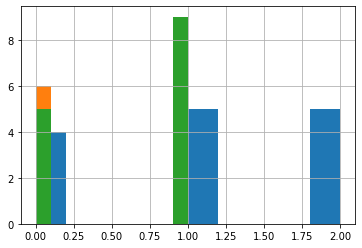

In [16]:
print(dataset['Outlook'].hist())
print(dataset['Windy'].hist())
print(dataset['Decision'].hist())

print(dataset.info())

In [17]:
print("Outlook \n", dataset['Outlook'].value_counts(normalize=True), '\n')
print("Windy \n", dataset['Windy'].value_counts(normalize=True), '\n')
print("Decision \n", dataset['Decision'].value_counts(normalize=True), '\n')

Outlook 
 2    0.357143
1    0.357143
0    0.285714
Name: Outlook, dtype: float64 

Windy 
 1    0.571429
0    0.428571
Name: Windy, dtype: float64 

Decision 
 1    0.642857
0    0.357143
Name: Decision, dtype: float64 



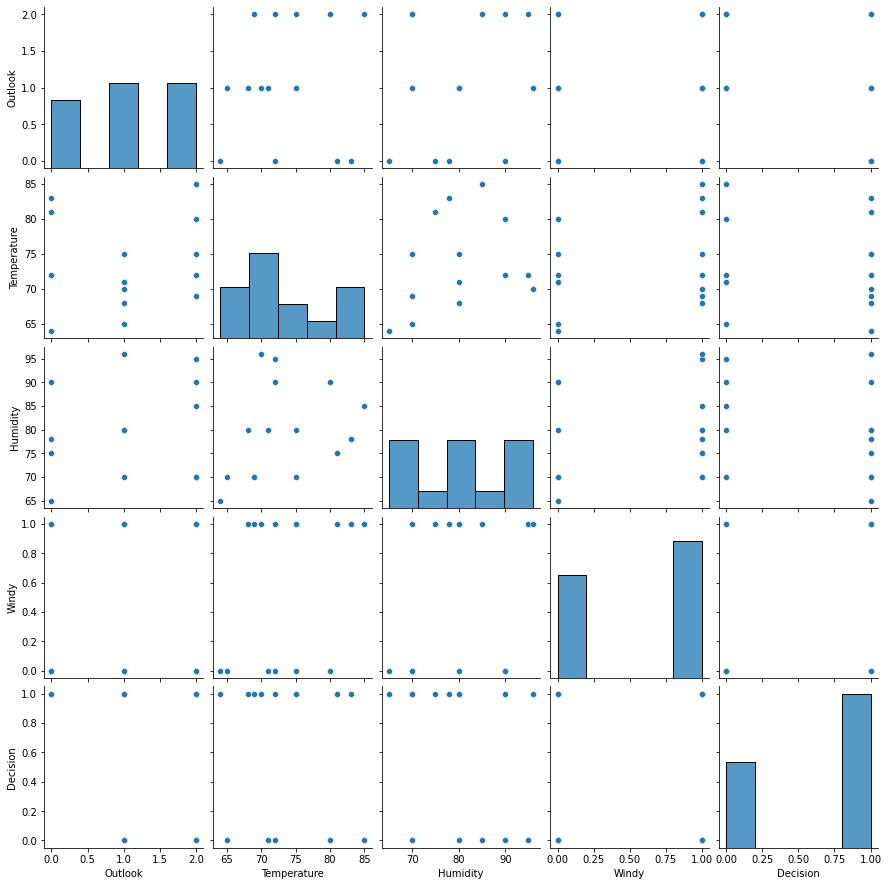

In [24]:
sns.pairplot(dataset)

Method: Ward
Metric: Euclidean


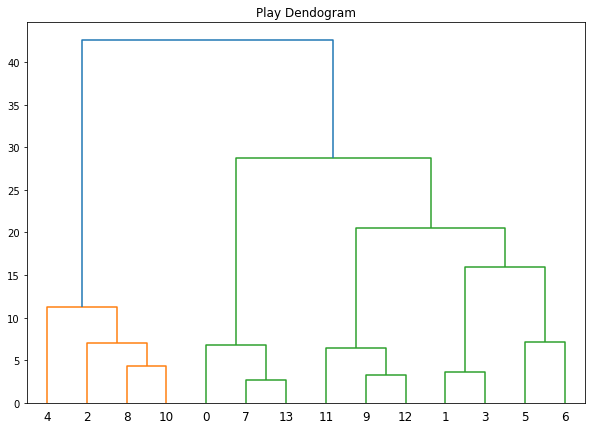

AttributeError: 'PathCollection' object has no property 'pallete'

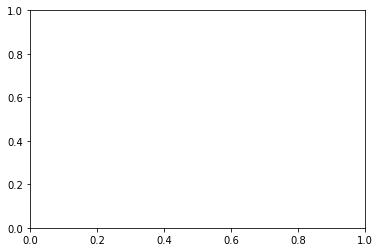

In [37]:
print("Method: Ward")
print("Metric: Euclidean")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='ward',metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(dataset)
clustering_model.labels_

data_labels = clustering_model.labels_
sns.scatterplot(x='Outlook',
                y='Decision',
                data=dataset,
                hue=data_labels,
                pallete='rainbow').set_title('Labeled Customer Data')

Method: Complete
Metric: Euclidean


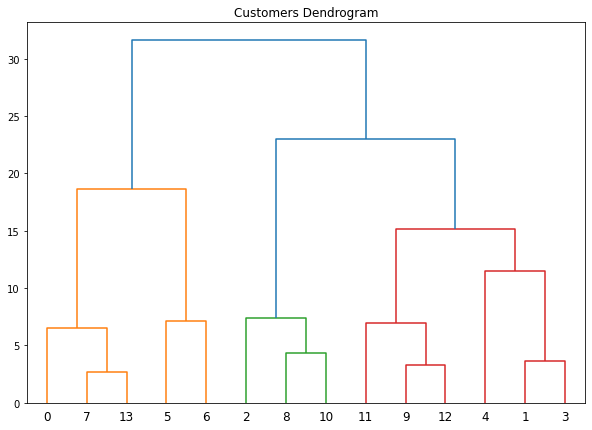

In [26]:
print("Method: Complete")
print("Metric: Euclidean")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Annual Income and Spending Scores by index
selected_data = dataset.iloc[:, :]
clusters = shc.linkage(selected_data,
            method='complete',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Method: Average
Metric: Euclidean


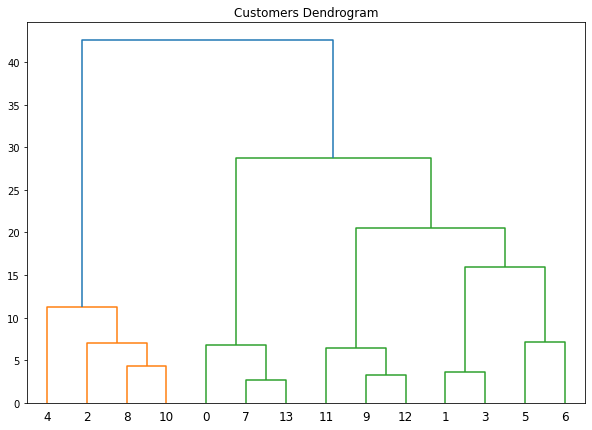

In [27]:
print("Method: Average")
print("Metric: Euclidean")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Annual Income and Spending Scores by index
selected_data = dataset.iloc[:, :]
clusters = shc.linkage(selected_data,
            method='ward',
            compute_distances='True',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Method: Single
Metric: Euclidean


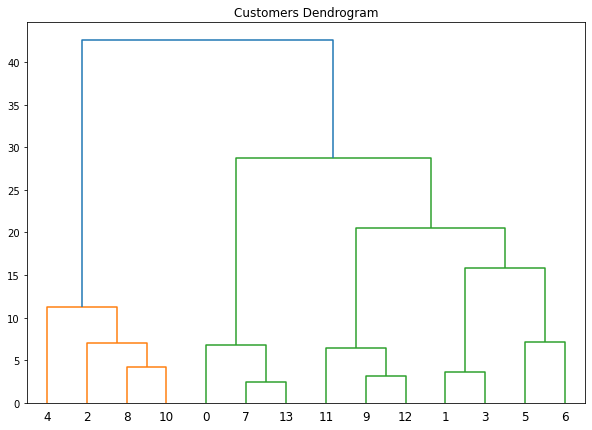

In [33]:
print("Method: Single")
print("Metric: Euclidean")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Annual Income and Spending Scores by index
selected_data = dataset.iloc[:, :-1]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()